### Importation des bibliothèque 

- **`from sklearn import neighbors`** : importe le module contenant les classes et fonctions liées à l’algorithme des **K plus proches voisins (KNN – K-Nearest Neighbors)**.  
  Cet algorithme classe un point en fonction des classes majoritaires de ses *k* voisins les plus proches dans l’espace des données.

- **`from sklearn import datasets`** : permet d’accéder à plusieurs **jeux de données intégrés** dans scikit-learn, comme *MNIST*, *Iris* ou *Breast Cancer*, utilisés pour les exercices et expérimentations.

- **`from sklearn.model_selection import train_test_split`** : permet de **diviser les données** en deux parties :  
  - un ensemble d’**entraînement** pour construire le modèle,  
  - un ensemble de **test** pour évaluer sa performance.

- **`import numpy as np`** : importe la bibliothèque **NumPy**, utilisée pour les opérations mathématiques et la manipulation de tableaux numériques, essentielle pour le traitement des données en apprentissage automatique.


In [1]:
from sklearn import neighbors
#from sklearn import databases 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

### Chargement de la base de données MNIST

- **`from sklearn.datasets import fetch_openml`** : importe la fonction `fetch_openml()` qui permet de télécharger des jeux de données depuis la plateforme OpenML directement via scikit-learn.

- **`mnist = fetch_openml('mnist_784', version=1)`** :  
  Télécharge la base de données **MNIST**, un jeu de données très utilisé pour la reconnaissance d’images.  
  - `mnist_784` correspond au nom du dataset (784 = 28×28 pixels par image).  
  - `version=1` précise la version du dataset à utiliser.  

La base MNIST contient 70 000 images de chiffres manuscrits (de 0 à 9), chacune représentée par 784 valeurs de pixels.  
Elle est couramment utilisée pour entraîner et évaluer des modèles de classification tels que le KNN, les SVM ou les réseaux de neurones.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

### Vérification du type de l’objet `mnist`

- **`type(mnist)`** : permet de connaître le **type de l’objet** retourné par la fonction `fetch_openml()`.


In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

### Dimensions des données

- **`print(mnist.data.shape)`** : affiche la **taille (dimensions)** du tableau contenant toutes les images du dataset MNIST.  

Le résultat attendu est :
(70000, 784)

Cela signifie :
- Il y a **70 000 images** au total.  
- Chaque image est représentée par **784 colonnes** correspondant aux pixels d’une image de **28 × 28** en niveaux de gris.

Ainsi, chaque ligne du tableau représente une image à plat (sous forme de vecteur de 784 valeurs numériques).


In [4]:
print (mnist.data.shape)

(70000, 784)


### Dimensions des étiquettes (cibles)

- **`print(mnist.target.shape)`** : affiche la **taille du vecteur des étiquettes** associées aux images du dataset MNIST.  

Le résultat attendu est :
(70000,)

Cela indique qu’il y a **70 000 étiquettes** (ou classes) correspondant aux **70 000 images** de chiffres manuscrits.  
Chaque valeur de ce vecteur représente le chiffre réel (de **0 à 9**) présent sur l’image correspondante.



In [5]:
#bach n3efo ch7al mn image 3ndha etikitte
print(mnist.target.shape)


(70000,)


l9ina bli l value data w target huma pandas.Series of strings w7na khasna ints ; donc la solution hia nsta3mlo la fonction .iloc bach nrdohom ints  

### Échantillonnage et division du jeu de données

- **`np.random.randint(70000, size=5000)`** : génère aléatoirement **5000 indices** compris entre 0 et 69 999.  
  Cela permet de créer un **échantillon réduit** du dataset MNIST pour accélérer les tests et l'entraînement du modèle.

- **`data = mnist.data.iloc[sample]`** : sélectionne les **5000 images** correspondant aux indices choisis.  
  Chaque image est représentée par un vecteur de 784 pixels.

- **`target = mnist.target.iloc[sample]`** : sélectionne les **étiquettes (chiffres)** associées aux images de l’échantillon.

- **`train_test_split(data, target, train_size=0.8)`** : divise l’échantillon en deux parties :
  - **80 % pour l’entraînement** (`x_train`, `y_train`)  
  - **20 % pour le test** (`x_test`, `y_test`)

Cette approche permet de travailler sur un sous-ensemble du dataset complet, réduisant le temps d’exécution tout en conservant une bonne représentativité des données.


In [6]:
sample = np.random.randint(70000,size=5000)
data = mnist.data.iloc[sample]
target=mnist.target.iloc[sample]

In [7]:
x_train, x_test, y_train, y_test=train_test_split(data,target,train_size=0.8)

### Création et entraînement du modèle KNN

- **`from sklearn.neighbors import KNeighborsClassifier`** : importe la classe `KNeighborsClassifier`, l’implémentation de l’algorithme **K-Nearest Neighbors (KNN)** dans scikit-learn.  
  Cet algorithme classe un nouvel échantillon en fonction des **k voisins les plus proches** dans l’espace des données.

- **`knn = KNeighborsClassifier()`** : crée un modèle KNN avec les **paramètres par défaut** (par défaut, `n_neighbors=5`, c’est-à-dire que le modèle considère les 5 plus proches voisins pour la décision).

- **`knn.fit(x_train, y_train)`** : entraîne le modèle sur les données d’entraînement.  
  Le modèle enregistre les échantillons du jeu d’apprentissage pour pouvoir comparer de futurs points à ceux-ci lors de la phase de prédiction.


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(3)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

andiro wa7d y-class/pred an predictiw bisti3mal knn.predict using x_test wghan9arno bino y_test bisti3mal la fonction accuracy_score 

### Évaluation du modèle KNN

- **`from sklearn.metrics import accuracy_score`** : importe la fonction `accuracy_score()` qui mesure la **précision** du modèle, c’est-à-dire la proportion de bonnes prédictions.

- **`y_class = knn.predict(x_test)`** : utilise le modèle KNN entraîné pour **prédire les classes** des échantillons du jeu de test.  
  Pour chaque image du test, le modèle recherche les *k* voisins les plus proches dans le jeu d’entraînement et attribue la classe majoritaire parmi eux.

- **`print(accuracy_score(y_test, y_class))`** : affiche la **précision du modèle**, c’est-à-dire le pourcentage d’images correctement classées.  
  Une valeur proche de 1 (ou 100 %) indique un bon niveau de performance du modèle sur les données de test.


In [9]:
from sklearn.metrics import accuracy_score

y_class=knn.predict(x_test)
print(accuracy_score(y_test, y_class))

0.915


### Optimisation du paramètre K dans le modèle KNN

- **`best_k = None`** et **`best_score = 0`** : initialisent les variables servant à stocker respectivement le meilleur nombre de voisins (*k*) et la meilleure précision obtenue.

- **`for k in range(2, 16):`** : lance une boucle qui teste les valeurs de *k* comprises entre 2 et 15 pour déterminer celle qui offre la meilleure performance.

- **`knn = KNeighborsClassifier(k)`** : crée un modèle KNN avec le nombre de voisins fixé à *k*.

- **`knn.fit(x_train, y_train)`** : entraîne le modèle sur les données d’apprentissage.

- **`preds = knn.predict(x_test)`** : effectue les prédictions sur les données de test pour la valeur actuelle de *k*.

- **`score = accuracy_score(y_test, preds)`** : calcule la précision du modèle, c’est-à-dire le pourcentage de prédictions correctes pour ce *k*.

- **`print(f"K = {k} → Accuracy = {score:.10f}")`** : affiche la précision obtenue pour chaque valeur de *k* testée.

- **`if score > best_score:`** : si la précision actuelle est meilleure que la précédente, on met à jour :
  - `best_score` → la meilleure précision atteinte,  
  - `best_k` → la valeur de *k* correspondante.

- **`print("\nBest K:", best_k, "with accuracy:", round(best_score, 4))`** : affiche le nombre de voisins optimal et la précision associée.

Ce code permet de **trouver automatiquement la valeur de K la plus performante** pour le modèle KNN, en testant plusieurs valeurs et en conservant celle offrant la meilleure précision de


In [10]:
best_k = None
best_score = 0

for k in range(2, 16):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_test)
    score = accuracy_score(y_test, preds)
    print(f"K = {k} → Accuracy = {score:.10f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print("\nBest K:", best_k, "with accuracy:", round(best_score, 4))

K = 2 → Accuracy = 0.9110000000
K = 3 → Accuracy = 0.9150000000
K = 4 → Accuracy = 0.9110000000
K = 5 → Accuracy = 0.9150000000
K = 6 → Accuracy = 0.9120000000
K = 7 → Accuracy = 0.9170000000
K = 8 → Accuracy = 0.9160000000
K = 9 → Accuracy = 0.9110000000
K = 10 → Accuracy = 0.9090000000
K = 11 → Accuracy = 0.9090000000
K = 12 → Accuracy = 0.9110000000
K = 13 → Accuracy = 0.9080000000
K = 14 → Accuracy = 0.9090000000
K = 15 → Accuracy = 0.9060000000

Best K: 7 with accuracy: 0.917


### Visualisation des prédictions du modèle KNN

- **`knn = neighbors.KNeighborsClassifier(2)`** : crée un modèle KNN avec **2 voisins** (valeur jugée optimale après les tests précédents).

- **`knn.fit(x_train, y_train)`** : entraîne le modèle sur les données d’apprentissage.

- **`predicted = knn.predict(x_test)`** : génère les **prédictions** pour les images du jeu de test.

- **`x_test.to_numpy().reshape((-1, 28, 28))`** :  
  - Convertit le DataFrame `x_test` en tableau NumPy pour pouvoir le manipuler numériquement.  
  - Reformate chaque ligne (784 pixels) en une image 2D de **28 × 28 pixels**.

- **`select = np.random.randint(images.shape[0], size=12)`** : sélectionne **12 images aléatoires** parmi les données de test pour affichage.

- **`plt.subplots(3, 4, figsize=(8, 6))`** : prépare une grille de **3 lignes et 4 colonnes** pour afficher les 12 images.

- La boucle `for` parcourt les 12 indices sélectionnés :
  - **`plt.imshow(images[value], cmap=plt.cm.gray_r)`** : affiche chaque image en niveaux de gris.  
  - **`plt.title('Predicted: {}'.format(predicted[value]))`** : indique la **classe prédite** par le modèle.  
  - **`plt.axis('off')`** : masque les axes pour un rendu plus clair.

- **`plt.show()`** : affiche toutes les images sur une même figure avec leurs prédictions respectives.

Ce code permet de **visualiser les chiffres manuscrits testés** et de **vérifier visuellement la justesse des prédictions** du modèle KNN.


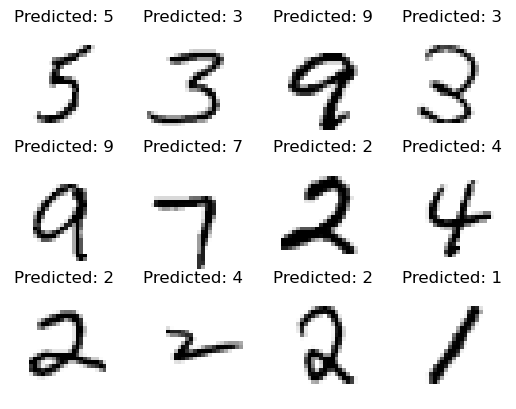

In [11]:
import matplotlib.pyplot as plt
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(2)
knn.fit(x_train, y_train)
# On récupère les prédictions sur les données test
predicted = knn.predict(x_test)
# On redimensionne les données sous forme d'images
x_test = x_test.to_numpy()
images = x_test.reshape((-1, 28, 28))
# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)
# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)
for index, value in enumerate(select):
 plt.subplot(3,4,index+1)
 plt.axis('off')
 plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
 plt.title('Predicted: {}'.format( predicted[value]) )
plt.show()

# Exercice 2 

### Importation des bibliothèques pour l’arbre de décision

- **`from sklearn import tree`** : importe le module `tree` de scikit-learn, qui contient les outils nécessaires pour construire et visualiser des **arbres de décision**.

- **`from sklearn.tree import DecisionTreeClassifier`** : importe la classe `DecisionTreeClassifier`, utilisée pour créer un **modèle de classification** basé sur un arbre de décision.

- **`from sklearn import metrics`** et **`from sklearn.metrics import accuracy_score`** : importent les fonctions d’évaluation du module `metrics`, notamment `accuracy_score`, qui permet de mesurer la **précision du modèle** (le pourcentage de bonnes prédictions).

- **`import pandas as pd`** : importe la bibliothèque **Pandas**, essentielle pour la manipulation de données tabulaires (lecture, filtrage, transformation, etc.), notamment lors du chargement de fichiers CSV.


In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd

### Chargement et aperçu de la base de données

- **`pd.read_csv('recruitment.csv')`** : lit le fichier CSV nommé **`recruitment.csv`** et le charge dans un objet **DataFrame** Pandas appelé `data`.  
  Ce fichier contient les informations relatives au processus de recrutement (par exemple : niveau d’éducation, expérience, stage, embauche, etc.).

- **`data.head(10)`** : affiche les **10 premières lignes** du DataFrame.  
  Cette commande permet de vérifier la bonne lecture du fichier et d’obtenir un aperçu du contenu des colonnes et des valeurs présentes.

L’objectif de cette étape est de **visualiser la structure du jeu de données** avant le prétraitement et la création du modèle d’arbre de décision.


In [13]:
data = pd.read_csv('recruitment.csv')
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'recruitment.csv'

mafhmtch so2al  ?

### Prétraitement des données – Conversion en valeurs numériques

- Les modèles de machine learning nécessitent des **valeurs numériques** en entrée.  
  Les colonnes contenant des chaînes de caractères doivent donc être converties en nombres.
- **`data['Employed?'] = data['Employed?'].map({'Y': 1, 'N': 0})`**  
  **`data['Top-tier school'] = data['Top-tier school'].map({'Y': 1, 'N': 0})`**  
  **`data['Interned'] = data['Interned'].map({'Y': 1, 'N': 0})`**  
  **`data['Hired'] = data['Hired'].map({'Y': 1, 'N': 0})`**  
  → Ces lignes convertissent les valeurs textuelles `'Y'` (Yes) et `'N'` (No) en **1 et 0** respectivement.  
  Cela permet d’utiliser ces variables dans le modèle d’apprentissage.

- **`from sklearn.preprocessing import LabelEncoder`** : importe l’outil `LabelEncoder` pour encoder les variables catégorielles non binaires.

- **`le = LabelEncoder()`** : crée une instance du codeur.

- **`data['Level of Education'] = le.fit_transform(data['Level of Education'])`** :  
  - Convertit la colonne **`Level of Education`** (par exemple : Bachelor, Master, PhD) en valeurs entières (0, 1, 2, …).  
  - Chaque niveau d’éducation reçoit un code numérique unique.

Cette étape de prétraitement permet de **rendre toutes les colonnes compatibles avec les algorithmes de classification**.

In [14]:
data['Employed?'] = data['Employed?'].map({'Y': 1, 'N': 0})
data['Top-tier school'] = data['Top-tier school'].map({'Y': 1, 'N': 0})
data['Interned'] = data['Interned'].map({'Y': 1, 'N': 0})
data['Hired'] = data['Hired'].map({'Y': 1, 'N': 0})


KeyError: 'Employed?'

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Level of Education'] = le.fit_transform(data['Level of Education'])


### Création et entraînement du modèle d’arbre de décision

- **`from sklearn.model_selection import train_test_split`** : importe la fonction qui permet de séparer les données en deux ensembles : un pour l’apprentissage et un pour le test.

- **`X = data.iloc[:, :-1]`** : sélectionne toutes les colonnes sauf la dernière comme **variables explicatives (features)**.  
  Ces colonnes représentent les caractéristiques utilisées pour prédire le résultat (par exemple : emploi, niveau d’éducation, stage…).

- **`y = data.iloc[:, -1]`** : sélectionne la **dernière colonne** comme **variable cible**, ici la colonne `Hired`, qui indique si la personne a été embauchée ou non.

- **`train_test_split(X, y, test_size=0.3, random_state=42)`** : divise les données en deux ensembles :  
  - **70 % pour l’entraînement** (`X_train`, `y_train`)  
  - **30 % pour le test** (`X_test`, `y_test`)  
  L’argument `random_state=42` assure la reproductibilité de la division.

- **`model = DecisionTreeClassifier()`** : crée un **modèle d’arbre de décision** pour un problème de classification.

- **`model.fit(X_train, y_train)`** : entraîne le modèle sur les données d’apprentissage afin qu’il apprenne à prédire la variable cible à partir des caractéristiques.

- **`y_pred = model.predict(X_test)`** : utilise le modèle entraîné pour **prédire** les résultats sur le jeu de test.

- **`metrics.accuracy_score(y_test, y_pred)`** : calcule la **précision du modèle**, c’est-à-dire la proportion de prédictions correctes.

Cette étape permet d’évaluer la performance du modèle d’arbre de décision sur les données de test après son apprentissage.


In [32]:
from sklearn.model_selection import train_test_split

# Création du modèle
#Préparer les données d’apprentissage et de test
X = data.iloc[ :,:-1]
y = data.iloc[ :,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("précision", metrics.accuracy_score(y_test, y_pred))


précision 0.6666666666666666


### Importation des bibliothèques pour la visualisation de l’arbre de décision

- **`from sklearn import tree`** : importe le module `tree` de scikit-learn, utilisé pour manipuler et exporter les structures d’arbres de décision.

- **`from sklearn.tree import export_graphviz`** : permet d’**exporter le modèle d’arbre de décision** au format **Graphviz (.dot)**, ce qui facilite sa visualisation sous forme de graphique.

- **`from IPython.display import Image`** : permet d’afficher directement des images (comme l’arbre généré) dans un **notebook Jupyter**.

- **`import pydotplus`** : bibliothèque utilisée pour **convertir le fichier .dot** généré par `export_graphviz` en image (PNG ou PDF).

- **`from six import StringIO`** : crée un flux en mémoire (similaire à un fichier temporaire) pour stocker les données `.dot` sans les sauvegarder physiquement sur le disque.

Ces bibliothèques sont utilisées ensemble pour **générer et afficher graphiquement l’arbre de décision** construit par le modèle.


In [33]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO

### Visualisation graphique de l’arbre de décision

- **`dot_data = StringIO()`** : crée un objet mémoire temporaire servant à stocker le contenu du fichier `.dot` (représentation textuelle de l’arbre de décision).

- **`export_graphviz(model, out_file=dot_data, feature_names=X.columns)`** :  
  Exporte la structure de l’arbre de décision entraîné (`model`) au format **Graphviz**.  
  - `out_file=dot_data` : envoie la sortie dans le flux mémoire au lieu d’un fichier.  
  - `feature_names=X.columns` : associe les noms réels des colonnes (caractéristiques) aux nœuds de l’arbre pour faciliter la lecture.

- **`graph = pydotplus.graph_from_dot_data(dot_data.getvalue())`** :  
  Convertit les données texte du format `.dot` en un **objet graphique** exploitable par la bibliothèque `pydotplus`.

- **`Image(graph.create_png())`** :  
  Génère et affiche l’arbre de décision sous forme d’**image PNG** directement dans le notebook Jupyter.

Ce code permet donc de **visualiser la structure hiérarchique de l’arbre de décision**, en montrant les critères de décision, les seuils de séparation et les classes prédites dans les feuilles.


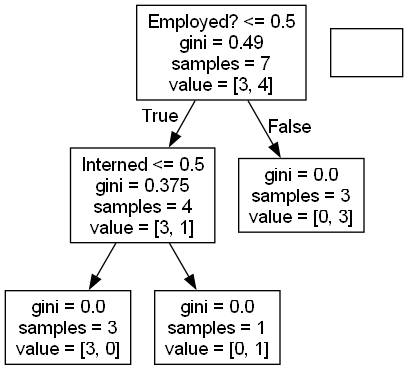

In [34]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,feature_names=X.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Exercice 3

Ce bloc importe toutes les bibliothèques nécessaires pour la mise en œuvre du modèle **SVM** (Support Vector Machine) :

- **`pandas` (`pd`)** : utilisée pour la manipulation et l’analyse de données tabulaires (DataFrames).  
- **`matplotlib.pyplot` (`plt`)** : sert à créer des visualisations, notamment des graphiques pour représenter les résultats.  
- **`numpy` (`np`)** : permet d’effectuer des calculs numériques et de manipuler des tableaux multidimensionnels efficacement.  
- **`sklearn.datasets`** : contient plusieurs jeux de données intégrés, comme `breast_cancer`, que nous allons utiliser.  
- **`sklearn.metrics`** : fournit des fonctions pour évaluer la performance du modèle (ex. : `accuracy_score`, `confusion_matrix`).  
- **`train_test_split`** du module `sklearn.model_selection` : permet de diviser les données en deux sous-ensembles — un pour l’entraînement et un pour le test.  
- **`StandardScaler`** du module `sklearn.preprocessing` : standardise les données afin d’avoir une moyenne nulle et un écart-type égal à 1, ce qui améliore la performance du SVM.  
- **`svm`** de `sklearn` : contient les classes et fonctions nécessaires à la création et à l’entraînement des modèles de machine learning basés sur les machines à vecteurs de support.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm


- **`data = datasets.load_breast_cancer()`** : charge la base de données intégrée *Breast Cancer Wisconsin* depuis `sklearn.datasets`.  
  Cette base contient des mesures de caractéristiques de cellules mammaires, utilisées pour classer les tumeurs comme *malignes* ou *bénignes*.

- **`print(data.keys())`** : affiche les différentes clés (informations) disponibles dans le dataset, comme :
  - `data` → les variables explicatives (features)
  - `target` → les classes (0 = malin, 1 = bénin)
  - `target_names` → les noms des classes
  - `DESCR` → la description détaillée du dataset
  - `feature_names` → les noms des colonnes

- **`print("Classes :", data.target_names)`** : affiche les deux classes possibles de la cible (par exemple : *['malignant', 'benign']*).

- **`print(data.DESCR)`** : affiche une description textuelle du dataset (nombre d’échantillons, variables, contexte, etc.).

- **`X = data.data`** : récupère les variables explicatives (caractéristiques numériques de chaque observation).

- **`Y = data.target`** : récupère la variable cible, c’est-à-dire la classe à prédire (0 ou 1).

In [36]:
data = datasets.load_breast_cancer()

print(data.keys())

print("Classes :", data.target_names)

print(data.DESCR)

X = data.data
Y = data.target


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Classes : ['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for 

- **`StandardScaler()`** : crée un objet permettant de standardiser les données numériques.  
  La standardisation consiste à centrer les valeurs autour de 0 et à leur donner un écart-type de 1.  
  Cela permet d’éviter qu’une variable ayant des valeurs élevées (ex. : poids, taille) ne domine les autres lors de l’apprentissage.

- **`scaler.fit_transform(X)`** :  
  - `fit()` calcule la moyenne et l’écart-type de chaque variable dans `X`.  
  - `transform()` applique la standardisation à ces variables.  
  - Ensemble, `fit_transform()` réalise les deux étapes en une seule.  

- La variable **`X`** contient maintenant les données standardisées, prêtes à être utilisées par le modèle **SVM**, qui est sensible à l’échelle des valeurs.

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


- **`train_test_split()`** : cette fonction permet de diviser le jeu de données en deux sous-ensembles :
  - **Ensemble d’entraînement (`X_train`, `y_train`)** : utilisé pour **apprendre** les relations entre les variables et la cible.  
  - **Ensemble de test (`X_test`, `y_test`)** : utilisé pour **évaluer** la performance du modèle sur des données qu’il n’a jamais vues.

- **`test_size=0.2`** : indique que **20 %** des données seront réservées pour le test, et donc **80 %** pour l’entraînement.

- **`random_state=42`** : fixe la graine aléatoire pour rendre la séparation **reproductible** (on obtient toujours la même division à chaque exécution).

 Après cette étape :
  - `X_train` et `y_train` serviront à **entraîner le modèle SVM**.
  - `X_test` et `y_test` serviront à **vérifier sa précision**.

In [38]:
X = data.data
Y = data.target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


- **`svm.SVC(kernel='linear')`** : crée un modèle SVM (Support Vector Classifier) utilisant un **noyau linéaire**, c’est-à-dire une frontière de décision en forme de ligne droite (ou d’hyperplan) pour séparer les classes.  
  Ce type de noyau est bien adapté lorsque les données sont **linéairement séparables**.

- **`model.fit(X_train, y_train)`** : entraîne le modèle sur l’ensemble d’apprentissage.  
  Le SVM cherche l’hyperplan qui sépare au mieux les deux classes (maligne / bénigne) avec la plus grande marge possible.

- **`model.predict(X_test)`** : applique le modèle entraîné sur les données de test afin de prédire la classe de chaque échantillon.

- **`pd.DataFrame({'Réel': y_test, 'Prédit': y_pred})`** : crée un tableau comparatif entre les **valeurs réelles** et les **valeurs prédites** pour visualiser la cohérence du modèle.

- **`metrics.accuracy_score(y_test, y_pred)`** : calcule la **précision** du modèle, c’est-à-dire le pourcentage de bonnes prédictions.  
  → Plus la précision est proche de 1, plus le modèle est performant.

- **`metrics.confusion_matrix(y_test, y_pred)`** : affiche la **matrice de confusion**, un tableau qui résume les cas correctement et incorrectement classés :
  - Diagonale principale → bonnes prédictions  
  - Autres valeurs → erreurs de classification

 Ce modèle SVM linéaire permet d’obtenir une première mesure de performance avant de tester d’autres noyaux (polynomial, sigmoïde, etc.).

In [40]:
model = svm.SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

comp = pd.DataFrame({'Réel': y_test, 'Prédit': y_pred})
print(comp.head())

linear_accuracy =  metrics.accuracy_score(y_test, y_pred)
print("Précision du modèle :", linear_accuracy)
print("Matrice de confusion :\n", metrics.confusion_matrix(y_test, y_pred))


   Réel  Prédit
0     1       1
1     0       0
2     0       0
3     1       1
4     1       1
Précision du modèle : 0.956140350877193
Matrice de confusion :
 [[39  4]
 [ 1 70]]


- **`svm.SVC(kernel='poly', degree=3, gamma='scale')`** : crée un modèle SVM utilisant un **noyau polynomial** d’ordre 3.  
  Ce noyau permet de créer une **frontière de décision non linéaire**, adaptée lorsque les données ne peuvent pas être séparées par une simple ligne droite.  
  - `degree=3` : définit l’ordre du polynôme utilisé.  
  - `gamma='scale'` : paramètre d’ajustement automatique qui influence la courbure de la frontière.

- **`model_poly.fit(X_train, y_train)`** : entraîne le modèle polynomial sur les données d’apprentissage.

- **`model_poly.predict(X_test)`** : prédit la classe des échantillons de test à l’aide du modèle polynomial.

- **`metrics.accuracy_score(y_test, y_pred_poly)`** : calcule la **précision** du modèle polynomial, c’est-à-dire la proportion de prédictions correctes.

 Cette étape permet de comparer la performance du **SVM polynomial** avec celle du **SVM linéaire** pour déterminer si une frontière non linéaire améliore (ou non) la classification.

In [41]:
model_poly = svm.SVC(kernel='poly', degree=3, gamma='scale')

model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)

poly_accuracy = metrics.accuracy_score(y_test, y_pred_poly)
print("Précision (noyau polynomial) :", poly_accuracy)



Précision (noyau polynomial) : 0.9473684210526315


- Ce bloc compare les précisions des deux modèles entraînés :
  - **`linear_accuracy`** → précision du modèle SVM linéaire  
  - **`poly_accuracy`** → précision du modèle SVM polynomial

- **`if linear_accuracy > poly_accuracy:`** :  
  Vérifie si la précision du modèle linéaire est supérieure à celle du modèle polynomial.

- **`print("\nLe modèle linéaire est plus performant.")`** :  
  S’affiche si le modèle linéaire donne de meilleurs résultats (meilleure précision).

- **`else:`** et **`print("\nLe modèle polynomial est plus performant.")`** :  
  S’exécute si, au contraire, le modèle polynomial surpasse le modèle linéaire.

 Ce test conditionnel permet de **comparer objectivement** les performances des deux modèles et d’identifier lequel offre la **meilleure capacité de classification** sur le jeu de test.

In [42]:
if linear_accuracy > poly_accuracy:
    print("\nLe modèle linéaire est plus performant.")
else:
    print("\nLe modèle polynomial est plus performant.")



Le modèle linéaire est plus performant.


- **`svm.SVC(kernel='sigmoid', gamma='scale', C=0.2)`** : crée un modèle SVM utilisant un **noyau sigmoïde**, qui applique une fonction logistique similaire à celle utilisée dans les réseaux de neurones.  
  - `kernel='sigmoid'` : indique que la fonction de noyau est sigmoïde.  
  - `gamma='scale'` : ajuste automatiquement le paramètre de courbure du noyau.  
  - `C=0.2` : paramètre de régularisation ; plus il est faible, plus le modèle accepte des erreurs afin d’éviter le surapprentissage (*overfitting*).

- **`model_sigmoid.fit(X_train, y_train)`** : entraîne le modèle sur les données d’apprentissage pour apprendre à séparer les classes à l’aide d’une fonction sigmoïde.

- **`model_sigmoid.predict(X_test)`** : utilise le modèle entraîné pour prédire les classes des données de test.

- **`metrics.accuracy_score(y_test, y_pred_sigmoid)`** : calcule la **précision** du modèle à noyau sigmoïde en comparant les prédictions aux valeurs réelles.

 Ce type de noyau est souvent utilisé lorsque la relation entre les variables est très complexe, mais dans ce dataset, il donne généralement une **précision inférieure** à celle du noyau linéaire.








In [43]:
model_sigmoid = svm.SVC(kernel='sigmoid', gamma='scale', C=0.2)

model_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = model_sigmoid.predict(X_test)

print("Précision (noyau sigmoïde) :", metrics.accuracy_score(y_test, y_pred_sigmoid))


Précision (noyau sigmoïde) : 0.6228070175438597
